In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

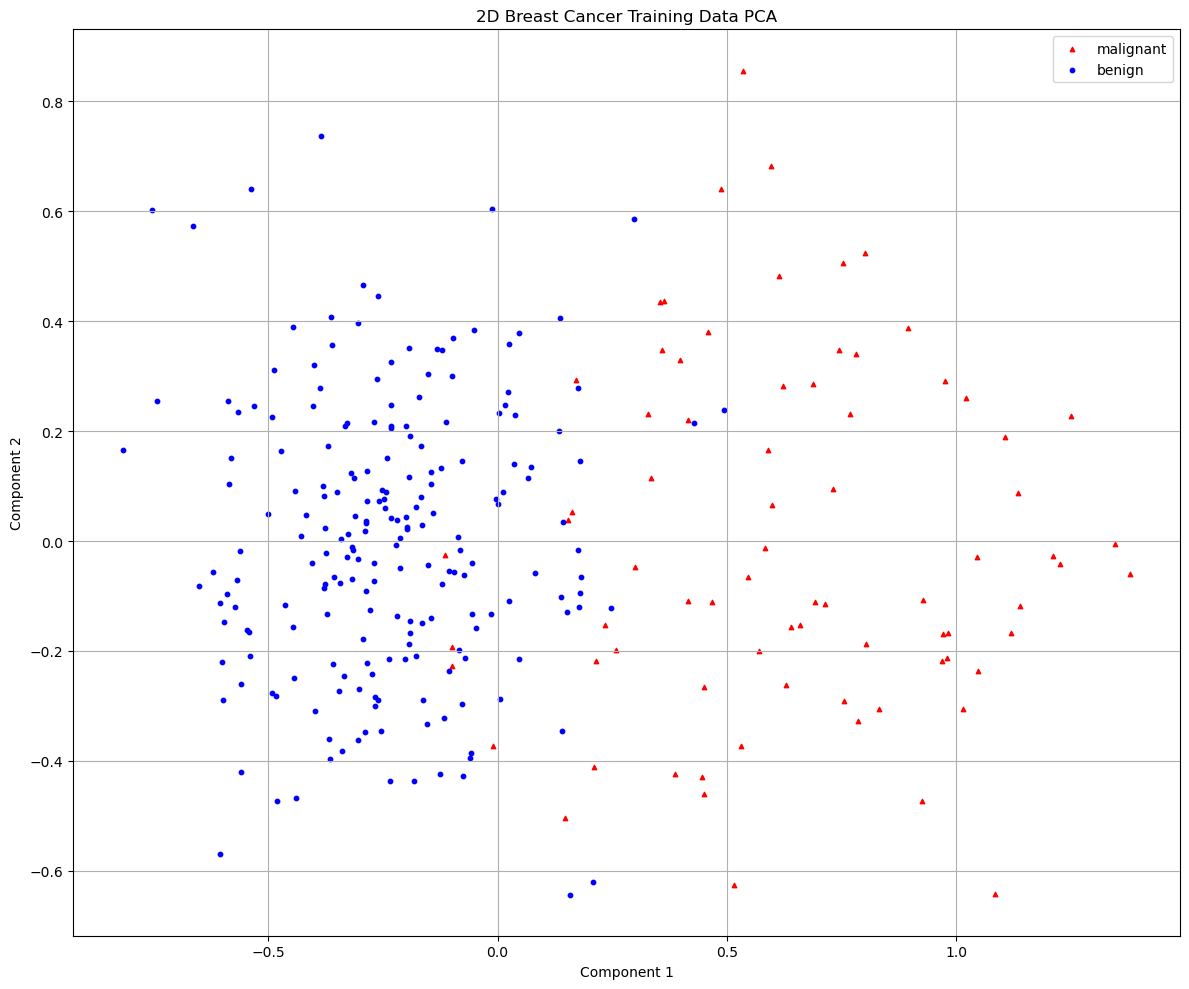

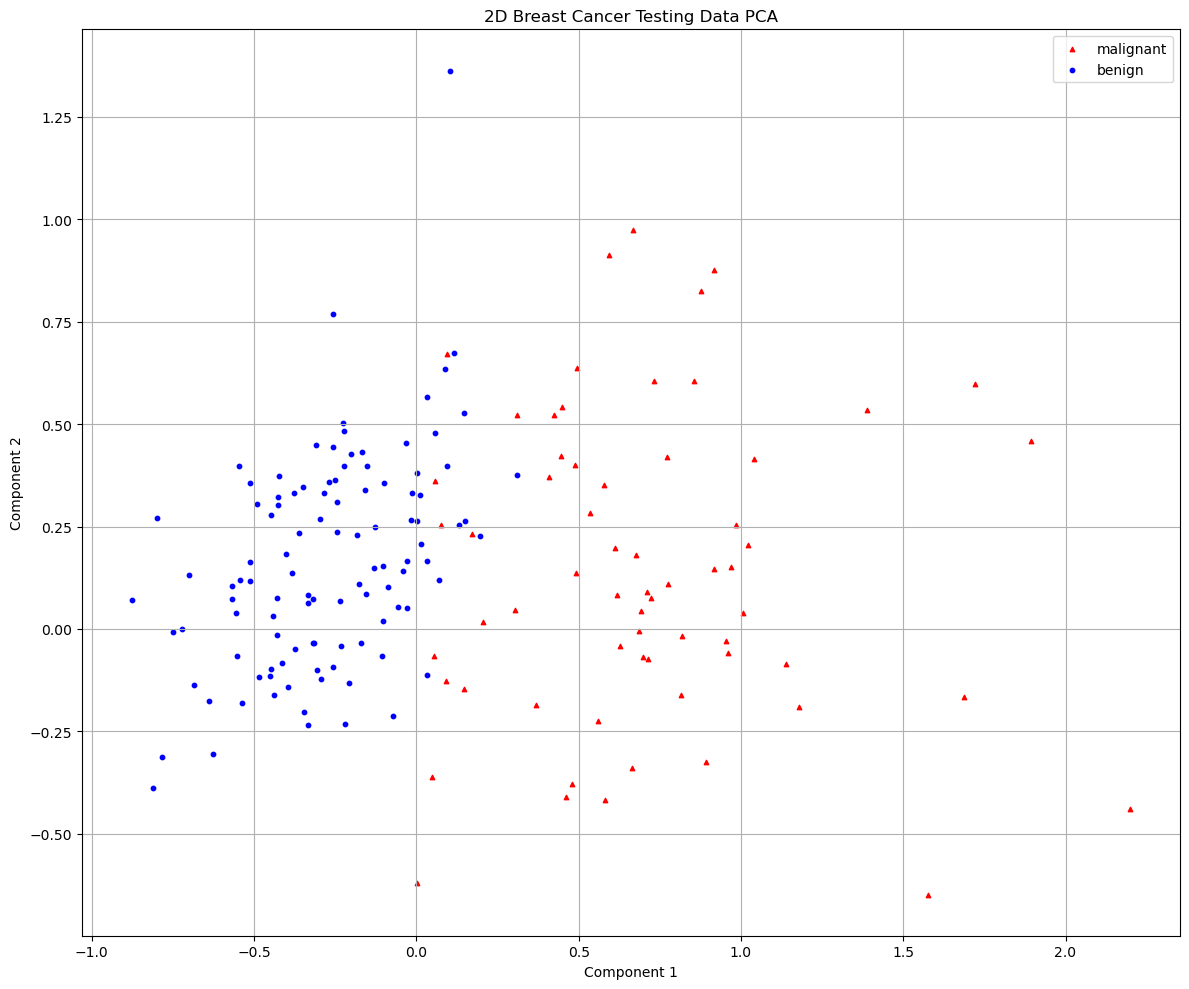

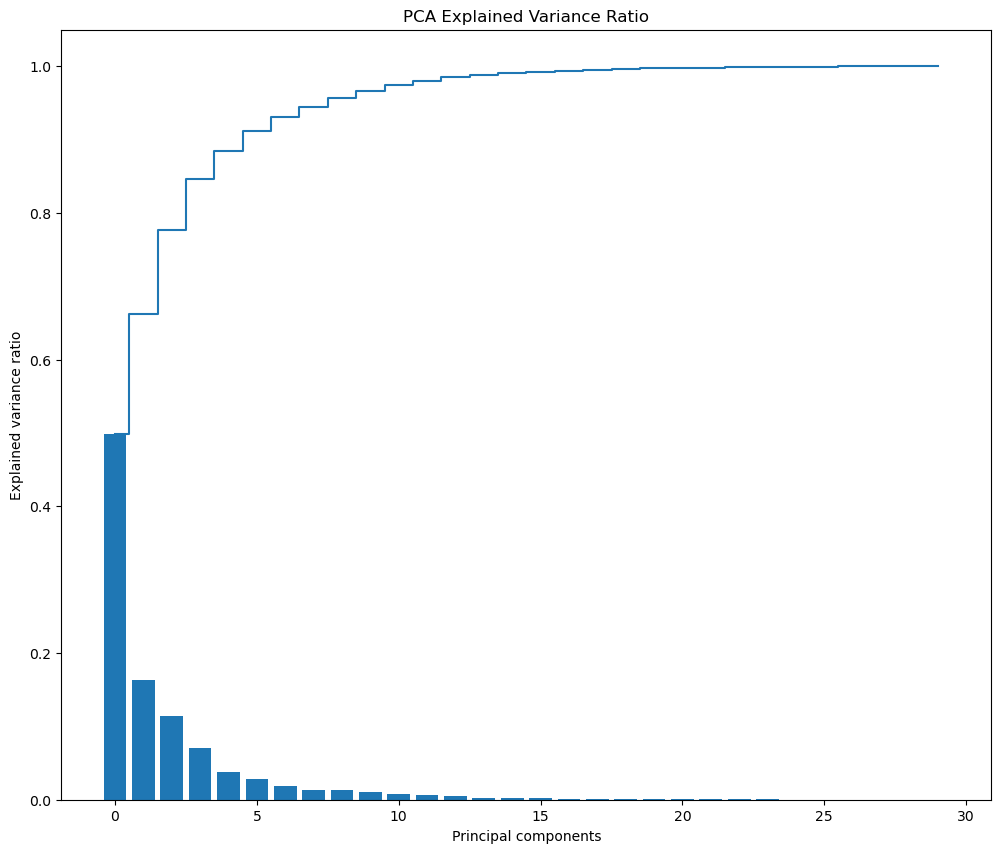

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

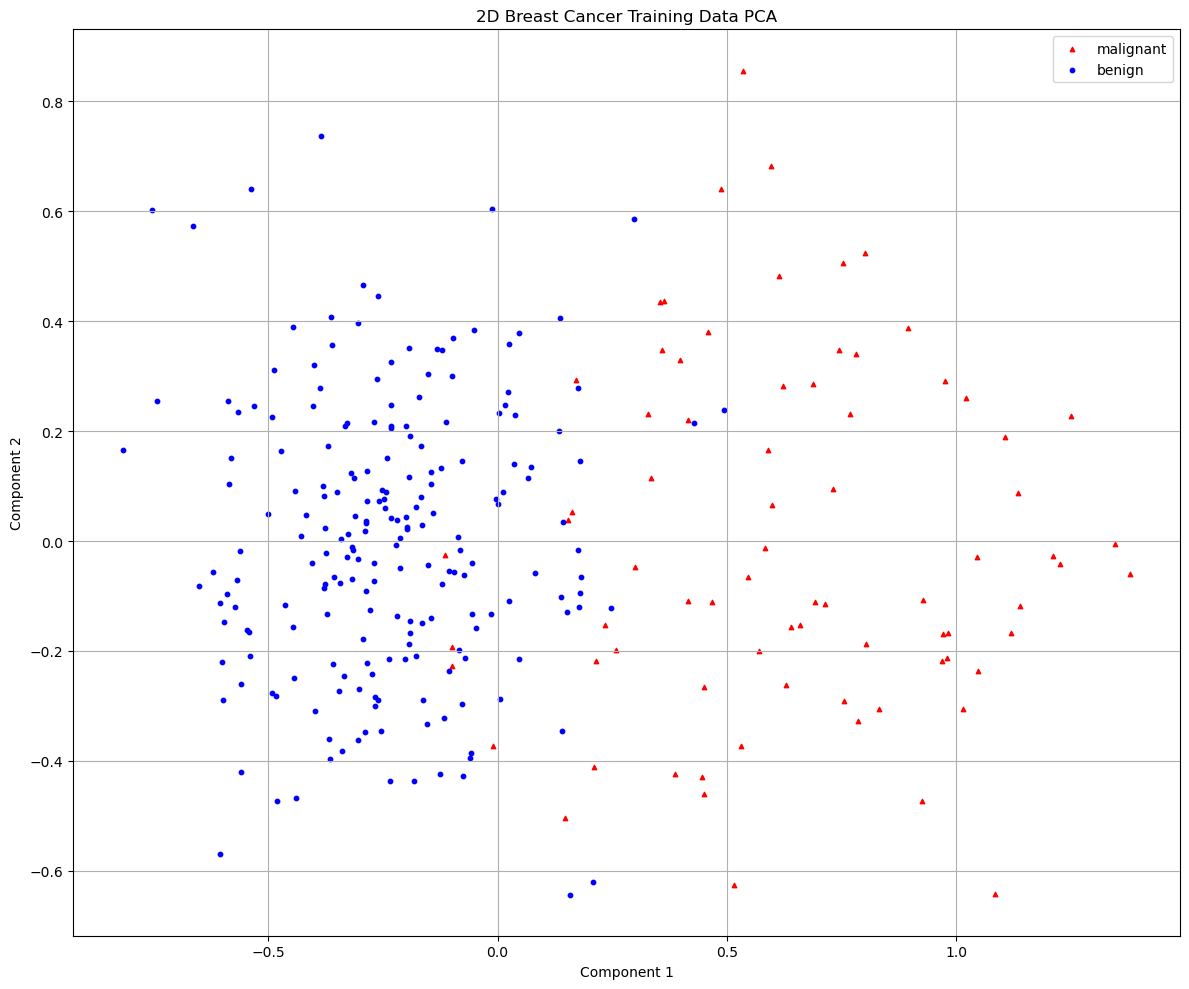

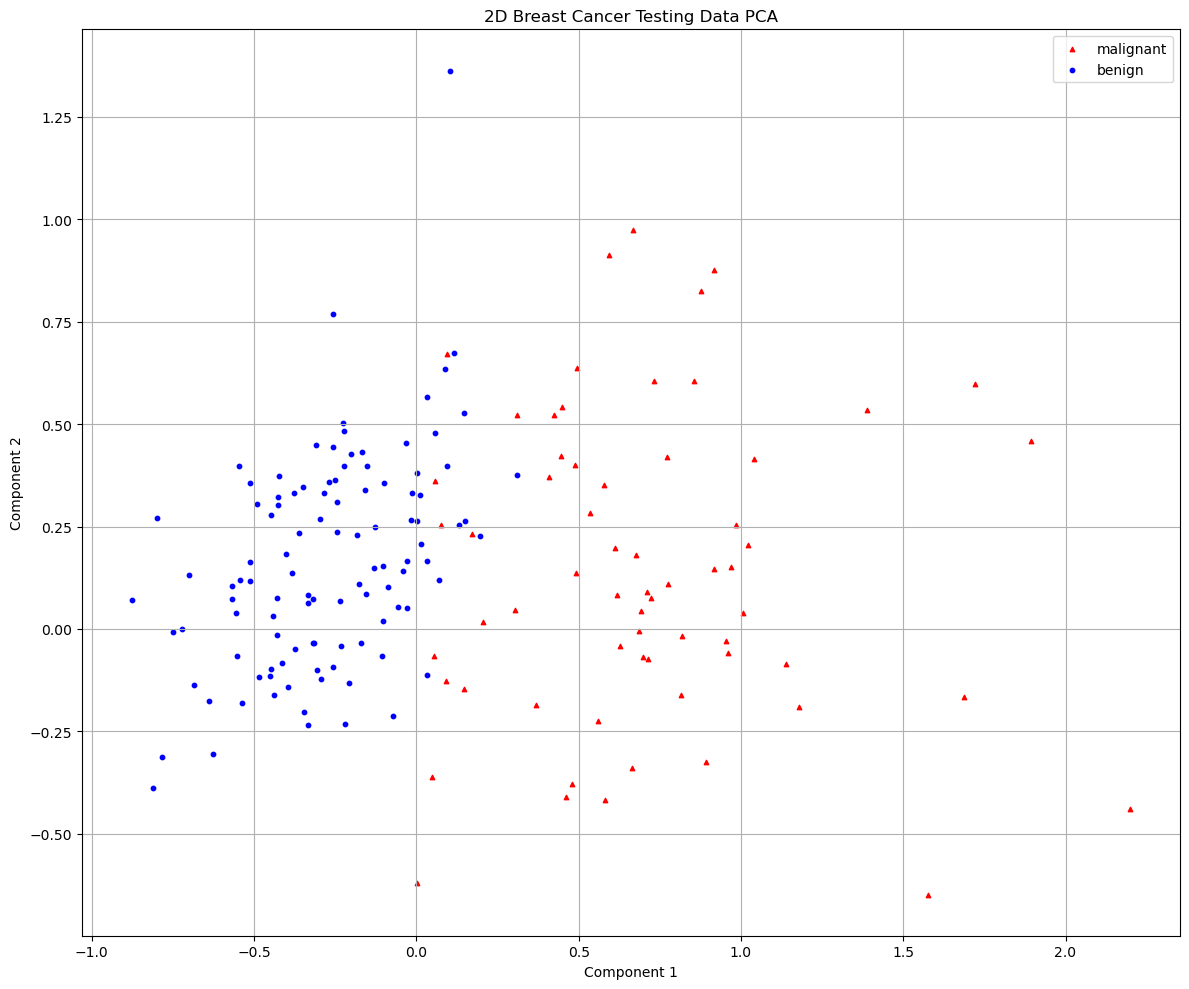

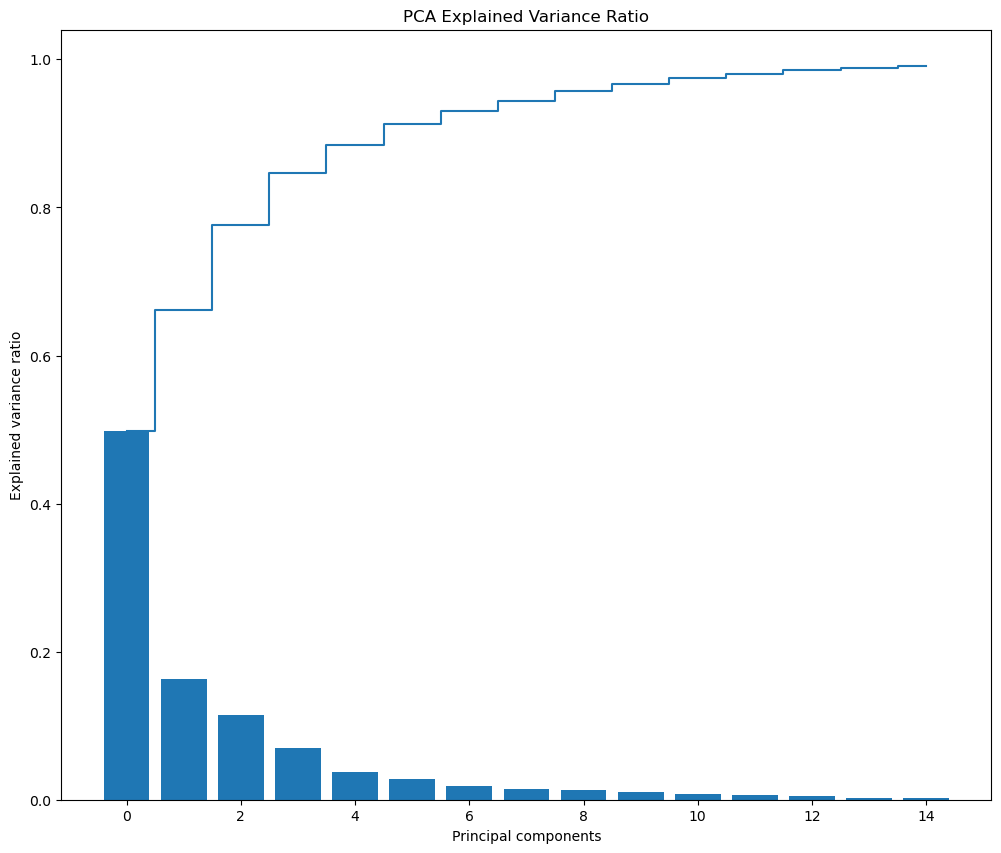

[I 2025-04-27 04:32:26,037] A new study created in memory with name: no-name-47221041-8343-4dd8-ae67-66a7fe0f972c
[I 2025-04-27 04:32:27,221] Trial 0 finished with value: 0.961524500907441 and parameters: {'n_estimators': 1248, 'learning_rate': 0.008753976274587925, 'num_leaves': 82, 'max_depth': 5, 'min_child_samples': 51, 'subsample': 0.8200237056461002, 'colsample_bytree': 0.7912385569095759, 'reg_alpha': 0.00018856033709421146, 'reg_lambda': 0.0004171965104686341}. Best is trial 0 with value: 0.961524500907441.
[I 2025-04-27 04:32:37,547] Trial 1 finished with value: 0.9581367211131276 and parameters: {'n_estimators': 9250, 'learning_rate': 0.01066075693657527, 'num_leaves': 25, 'max_depth': 6, 'min_child_samples': 24, 'subsample': 0.8799019833901582, 'colsample_bytree': 0.6524084876845138, 'reg_alpha': 1.48921113133038e-05, 'reg_lambda': 0.00480447364355462}. Best is trial 0 with value: 0.961524500907441.
[I 2025-04-27 04:32:50,389] Trial 2 finished with value: 0.9651542649727768 

Best trial:
Accuracy: 0.9684815486993346
Best hyperparameters:  {'n_estimators': 8664, 'learning_rate': 0.0071318229062201114, 'num_leaves': 100, 'max_depth': 8, 'min_child_samples': 49, 'subsample': 0.8937666503863343, 'colsample_bytree': 0.5526761550867192, 'reg_alpha': 1.179442166276793e-05, 'reg_lambda': 0.0001926124189711637}


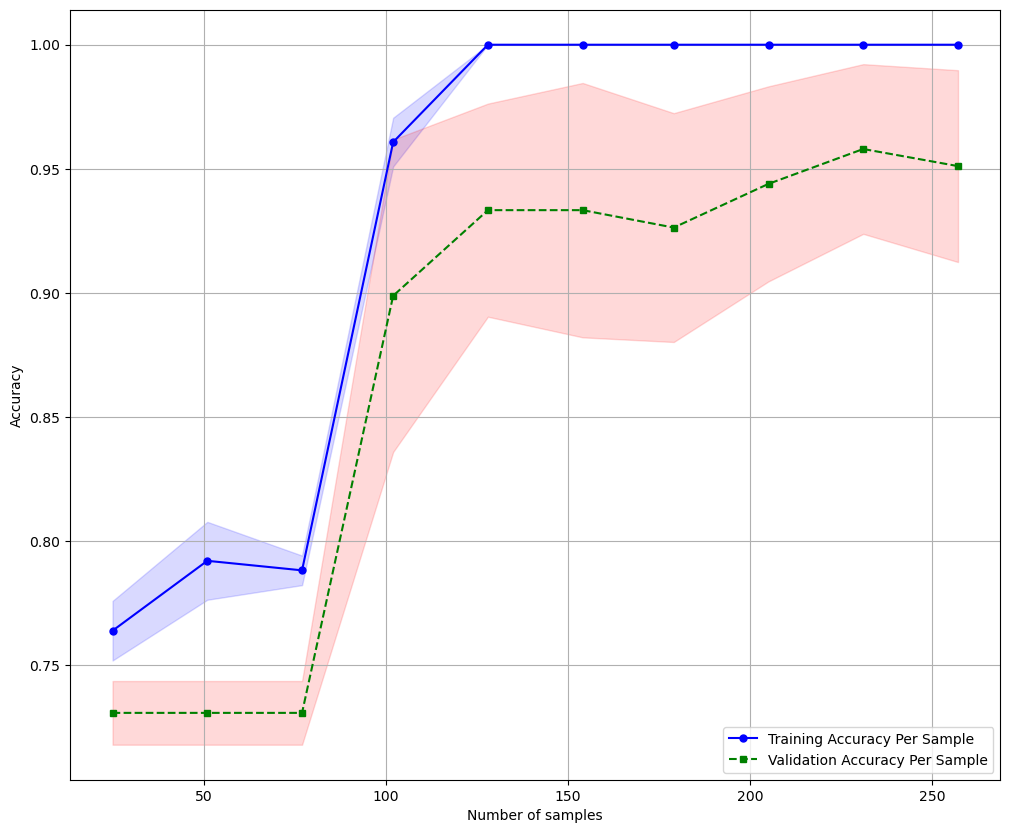

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC:0.9785


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)